In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [15]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

In [17]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
test_images.shape

(10000, 28, 28)

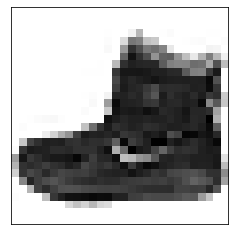

In [20]:
plt.imshow(train_images[0],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.show()

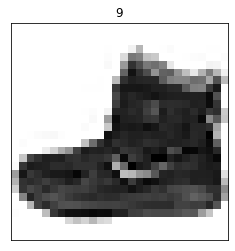

In [21]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

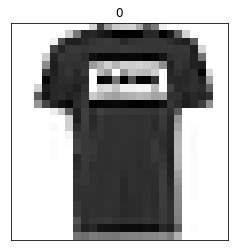

In [22]:
plt.imshow(train_images[1],cmap='gray_r')
plt.title(train_labels[1])
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
class_names[0]

'T-shirt/top'

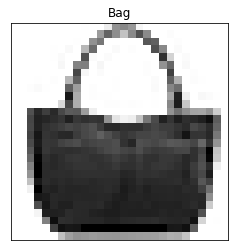

In [28]:
plt.imshow(train_images[100],cmap='gray_r')
plt.title(class_names[train_labels[100]])
plt.xticks([])
plt.yticks([])
plt.show()

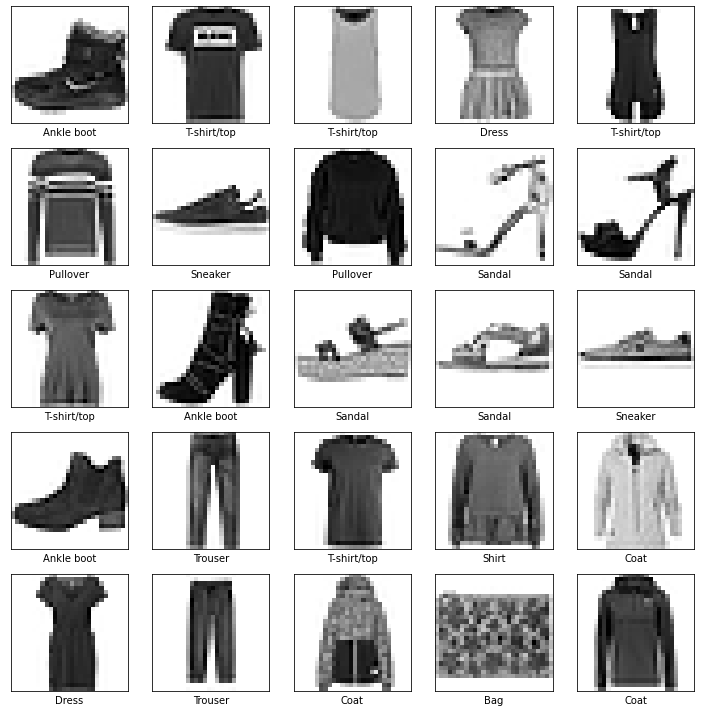

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show() 

In [35]:
train_images = train_images/255.0
test_images = test_images/255.0

In [38]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
# Apply DNN 

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
history = model.fit(train_images, train_labels,validation_split=0.2, epochs=50,verbose=2)

Epoch 1/50
1500/1500 - 7s - loss: 0.4937 - accuracy: 0.8253 - val_loss: 0.4109 - val_accuracy: 0.8509
Epoch 2/50
1500/1500 - 7s - loss: 0.3670 - accuracy: 0.8657 - val_loss: 0.3599 - val_accuracy: 0.8685
Epoch 3/50
1500/1500 - 6s - loss: 0.3280 - accuracy: 0.8784 - val_loss: 0.3665 - val_accuracy: 0.8652
Epoch 4/50
1500/1500 - 7s - loss: 0.3057 - accuracy: 0.8867 - val_loss: 0.3539 - val_accuracy: 0.8694
Epoch 5/50
1500/1500 - 8s - loss: 0.2852 - accuracy: 0.8921 - val_loss: 0.3424 - val_accuracy: 0.8801
Epoch 6/50
1500/1500 - 8s - loss: 0.2684 - accuracy: 0.8998 - val_loss: 0.3270 - val_accuracy: 0.8831
Epoch 7/50
1500/1500 - 7s - loss: 0.2574 - accuracy: 0.9037 - val_loss: 0.3389 - val_accuracy: 0.8811
Epoch 8/50
1500/1500 - 7s - loss: 0.2433 - accuracy: 0.9090 - val_loss: 0.3170 - val_accuracy: 0.8873
Epoch 9/50
1500/1500 - 7s - loss: 0.2339 - accuracy: 0.9128 - val_loss: 0.3189 - val_accuracy: 0.8911
Epoch 10/50
1500/1500 - 7s - loss: 0.2234 - accuracy: 0.9150 - val_loss: 0.3274 - 

In [45]:
history.history

{'loss': [0.4936792850494385,
  0.36695951223373413,
  0.32797661423683167,
  0.3056555688381195,
  0.2852279841899872,
  0.26840683817863464,
  0.25740498304367065,
  0.2432572841644287,
  0.2339196354150772,
  0.22338807582855225,
  0.2149786800146103,
  0.20665396749973297,
  0.19706837832927704,
  0.19264855980873108,
  0.18504273891448975,
  0.17844051122665405,
  0.17137597501277924,
  0.16693957149982452,
  0.16364459693431854,
  0.15277700126171112,
  0.15223398804664612,
  0.14522868394851685,
  0.14106091856956482,
  0.1388680636882782,
  0.13235153257846832,
  0.12964066863059998,
  0.12435992062091827,
  0.1234329342842102,
  0.12067794054746628,
  0.11766550689935684,
  0.11195746809244156,
  0.10670434683561325,
  0.10787669569253922,
  0.1020168662071228,
  0.1069086417555809,
  0.09564448148012161,
  0.09664643555879593,
  0.09628203511238098,
  0.09565596282482147,
  0.08943688124418259,
  0.08805537223815918,
  0.08864055573940277,
  0.08685417473316193,
  0.084547750

In [46]:
history.history['loss']

[0.4936792850494385,
 0.36695951223373413,
 0.32797661423683167,
 0.3056555688381195,
 0.2852279841899872,
 0.26840683817863464,
 0.25740498304367065,
 0.2432572841644287,
 0.2339196354150772,
 0.22338807582855225,
 0.2149786800146103,
 0.20665396749973297,
 0.19706837832927704,
 0.19264855980873108,
 0.18504273891448975,
 0.17844051122665405,
 0.17137597501277924,
 0.16693957149982452,
 0.16364459693431854,
 0.15277700126171112,
 0.15223398804664612,
 0.14522868394851685,
 0.14106091856956482,
 0.1388680636882782,
 0.13235153257846832,
 0.12964066863059998,
 0.12435992062091827,
 0.1234329342842102,
 0.12067794054746628,
 0.11766550689935684,
 0.11195746809244156,
 0.10670434683561325,
 0.10787669569253922,
 0.1020168662071228,
 0.1069086417555809,
 0.09564448148012161,
 0.09664643555879593,
 0.09628203511238098,
 0.09565596282482147,
 0.08943688124418259,
 0.08805537223815918,
 0.08864055573940277,
 0.08685417473316193,
 0.0845477506518364,
 0.07987387478351593,
 0.07996610552072525,

In [47]:
history.history['accuracy']

[0.8253333568572998,
 0.8657291531562805,
 0.8784166574478149,
 0.8867291808128357,
 0.8921458125114441,
 0.8997916579246521,
 0.9036874771118164,
 0.9089791774749756,
 0.9127916693687439,
 0.9150208234786987,
 0.918874979019165,
 0.9228125214576721,
 0.924958348274231,
 0.9278125166893005,
 0.9307708144187927,
 0.9320208430290222,
 0.9356041550636292,
 0.9365624785423279,
 0.9379791617393494,
 0.9420833587646484,
 0.9420833587646484,
 0.9456666707992554,
 0.945687472820282,
 0.9473541378974915,
 0.9491875171661377,
 0.9510625004768372,
 0.9530624747276306,
 0.9530208110809326,
 0.9552500247955322,
 0.9548541903495789,
 0.9577916860580444,
 0.9595416784286499,
 0.9596874713897705,
 0.961270809173584,
 0.9598958492279053,
 0.9633749723434448,
 0.9638333320617676,
 0.9631666541099548,
 0.9645833373069763,
 0.9662291407585144,
 0.9674166440963745,
 0.9664999842643738,
 0.9664375185966492,
 0.9679375290870667,
 0.9704166650772095,
 0.9700208306312561,
 0.9712916612625122,
 0.97145831584930

In [48]:
history.history['val_loss']

[0.4108814299106598,
 0.35990768671035767,
 0.3664829432964325,
 0.3539220094680786,
 0.34235629439353943,
 0.3270080089569092,
 0.3388698101043701,
 0.31702709197998047,
 0.31892821192741394,
 0.32740262150764465,
 0.34034988284111023,
 0.32688817381858826,
 0.3186620771884918,
 0.33082646131515503,
 0.33428439497947693,
 0.329189658164978,
 0.35111379623413086,
 0.35291987657546997,
 0.3559606671333313,
 0.3498227000236511,
 0.3488446772098541,
 0.35149046778678894,
 0.3676227331161499,
 0.380331426858902,
 0.3736044466495514,
 0.38103213906288147,
 0.4056835472583771,
 0.388997346162796,
 0.39040911197662354,
 0.38561978936195374,
 0.4113963544368744,
 0.44604870676994324,
 0.43994855880737305,
 0.4287406802177429,
 0.44831234216690063,
 0.46163931488990784,
 0.4749198257923126,
 0.4446854591369629,
 0.481710821390152,
 0.4825355112552643,
 0.46374377608299255,
 0.4724184572696686,
 0.5252174735069275,
 0.4863705635070801,
 0.5287890434265137,
 0.5299245715141296,
 0.540818393230438

In [49]:
history.history['val_accuracy']

[0.8509166836738586,
 0.8684999942779541,
 0.8652499914169312,
 0.8694166541099548,
 0.8800833225250244,
 0.8830833435058594,
 0.8810833096504211,
 0.8872500061988831,
 0.8910833597183228,
 0.8885833621025085,
 0.8856666684150696,
 0.8884166479110718,
 0.8912500143051147,
 0.8894166946411133,
 0.8920000195503235,
 0.890999972820282,
 0.8894166946411133,
 0.8917499780654907,
 0.8951666951179504,
 0.8925833106040955,
 0.8966666460037231,
 0.8941666483879089,
 0.8943333625793457,
 0.8951666951179504,
 0.8949166536331177,
 0.8943333625793457,
 0.8919166922569275,
 0.8952500224113464,
 0.8973333239555359,
 0.8955000042915344,
 0.893916666507721,
 0.8925833106040955,
 0.8934999704360962,
 0.8974999785423279,
 0.8930000066757202,
 0.8914999961853027,
 0.8919166922569275,
 0.8964166641235352,
 0.893666684627533,
 0.8960000276565552,
 0.8942499756813049,
 0.8985833525657654,
 0.8920000195503235,
 0.8964999914169312,
 0.890999972820282,
 0.8920833468437195,
 0.890500009059906,
 0.892583310604095

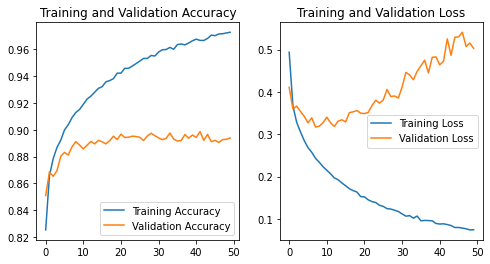

In [50]:
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()

In [51]:
# early Stopping

In [52]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [53]:
model_new.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [54]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [55]:
history = model_new.fit(train_images, train_labels, epochs=50, validation_split=0.2,callbacks=callback,verbose=1)

Epoch 1/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4932 - accuracy: 0.8250 - val_loss: 0.4051 - val_accuracy: 0.8547
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3695 - accuracy: 0.8632 - val_loss: 0.3617 - val_accuracy: 0.8679
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3324 - accuracy: 0.8783 - val_loss: 0.3388 - val_accuracy: 0.8784
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3040 - accuracy: 0.8867 - val_loss: 0.3294 - val_accuracy: 0.8838
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2862 - accuracy: 0.8937 - val_loss: 0.3341 - val_accuracy: 0.8767
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2706 - accuracy: 0.8994 - val_loss: 0.3106 - val_accuracy: 0.8898
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2545 - accuracy: 0.9060 - val_loss: 0.3278 - val_accurac

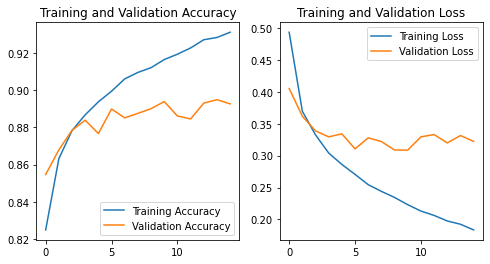

In [57]:
epochs = 15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()

In [58]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5753 - accuracy: 0.8890


[0.5753288865089417, 0.8889999985694885]

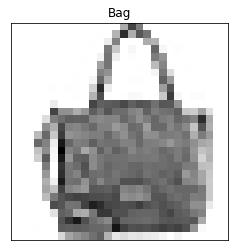

In [59]:
plt.imshow(test_images[2000],cmap='gray_r')
plt.title(class_names[test_labels[2000]])
plt.xticks([])
plt.yticks([])
plt.show()

In [60]:
model.predict(test_images[2000].reshape(1,28,28))

array([[1.1026014e-21, 1.3032440e-26, 1.6401629e-25, 3.2223447e-29,
        1.2935704e-19, 2.7517119e-28, 2.4960474e-20, 2.6586739e-18,
        1.0000000e+00, 4.1046617e-25]], dtype=float32)

In [61]:
model.predict(test_images[2000].reshape(1,28,28)).round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [62]:
np.argmax(model.predict(test_images[2000].reshape(1,28,28)).round(3))

8

In [63]:
class_names[np.argmax(model.predict(test_images[2000].reshape(1,28,28)),axis=1)[0]]

'Bag'